# Retrieving Gender Information in Common Nouns [to be finished]  
In this Notebook : attempts to isolate Word Embeddings dimension coding for **gender information** (masculine/feminine) in a sample of Word Embeddings for **common Nouns**. 
Sample = 3000 masculine NOUNS + 3000 feminine NOUNS

### Data import

In [2]:
import pandas as pd

top_freq_n = pd.read_csv('Most Frequent Words/top_frequent_pure_NOUN_FlauBERT.csv', index_col='Word')
top_freq_n

,Unnamed: 0,lemme,cgram,genre,nombre,freqlemlivres
Word,,,,,,
homme,0,homme,NOM,m,s,1398.85
hommes,1,homme,NOM,m,p,1398.85
jour,2,jour,NOM,m,s,1341.76
jours,3,jour,NOM,m,p,1341.76
oeil,5,oeil,NOM,m,s,1234.59
...,...,...,...,...,...,...
éthylène,48267,éthylène,NOM,m,s,0.00
étiquetage,48269,étiquetage,NOM,m,s,0.00
évangélisation,48274,évangélisation,NOM,f,s,0.00


In [3]:
# Sample of 3000 masculine Nouns
top_masc_n = top_freq_n[top_freq_n["genre"] == "m"][:3000]
top_masc_n

,Unnamed: 0,lemme,cgram,genre,nombre,freqlemlivres
Word,,,,,,
homme,0,homme,NOM,m,s,1398.85
hommes,1,homme,NOM,m,p,1398.85
jour,2,jour,NOM,m,s,1341.76
jours,3,jour,NOM,m,p,1341.76
oeil,5,oeil,NOM,m,s,1234.59
...,...,...,...,...,...,...
billon,34264,billon,NOM,m,s,0.14
bit,34275,bit,NOM,m,s,0.14
bits,34276,bit,NOM,m,p,0.14


In [4]:
# Sample of 3000 feminine nouns
top_fem_n = top_freq_n[top_freq_n["genre"] == "f"][:3000]
top_fem_n

,Unnamed: 0,lemme,cgram,genre,nombre,freqlemlivres
Word,,,,,,
mains,9,main,NOM,f,p,1229.39
fois,10,fois,NOM,f,p,1140.00
femme,14,femme,NOM,f,s,995.74
femmes,15,femme,NOM,f,p,995.74
heure,16,heure,NOM,f,s,924.05
...,...,...,...,...,...,...
synergie,47526,synergie,NOM,f,s,0.00
synergies,47527,synergie,NOM,f,p,0.00
sécurisation,47546,sécurisation,NOM,f,s,0.00


In [5]:
all_n_we = pd.read_csv('all_nouns_we.csv', index_col=0)
masc_n_we = all_n_we.merge(top_masc_n, left_index=True, right_index=True)
fem_n_we = all_n_we.merge(top_fem_n, left_index=True, right_index=True)

In [6]:
masc_n_we

,0,1,2,3,4,5,6,7,8,9,...,510,511,gn,gender,Unnamed: 0,lemme,cgram,genre,nombre,freqlemlivres
abaissement,3.209496,-2.750259,2.293690,0.207780,-1.170953,-5.999461,-0.837151,4.209501,0.482295,2.926001,...,1.347664,-4.607303,singular,masculine,14697,abaissement,NOM,m,s,2.16
abandon,3.841302,-2.121901,-1.159175,-5.437495,-1.977204,-4.404269,-5.100209,2.764617,-2.829459,-1.417439,...,3.346283,-3.959826,singular,masculine,2679,abandon,NOM,m,s,27.36
abattage,4.052270,-2.679920,3.119418,-2.519351,5.416730,-5.589840,1.757147,-2.409515,-3.995972,1.548392,...,-2.092886,-5.887840,singular,masculine,18747,abattage,NOM,m,s,1.28
abattement,1.251544,-3.949184,-2.307352,-3.988527,2.634396,-7.214885,-1.924418,-2.761284,-3.524342,2.768017,...,1.376887,-2.998725,singular,masculine,13237,abattement,NOM,m,s,2.64
abattoir,5.709659,-0.269411,1.361999,-3.692589,4.481276,-5.486260,-2.153412,-1.013103,-4.666839,1.297339,...,-0.736041,0.205831,singular,masculine,9577,abattoir,NOM,m,s,4.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
évêque,-0.117419,-7.287769,-4.520263,1.025380,1.523601,-0.131053,-0.143340,2.393525,3.556811,-1.809259,...,-2.629229,-2.942728,singular,masculine,3596,évêque,NOM,m,s,19.32
évêques,-0.335831,-4.775789,-1.211351,1.877633,2.294998,-0.796616,-2.214437,1.854783,4.215734,-0.027351,...,-2.439293,-1.000813,plural,masculine,3597,évêque,NOM,m,p,19.32
êtres,3.589590,-4.551544,6.088149,2.847501,3.829500,-3.342109,2.749030,-0.169812,1.994654,0.893699,...,0.167977,-1.285041,plural,masculine,514,être,NOM,m,p,122.57
îlot,5.139837,-7.427926,4.884292,1.064615,1.387612,-4.198579,-1.997534,4.594993,2.311641,1.507236,...,1.712433,-3.325491,singular,masculine,5590,îlot,NOM,m,s,10.68


In [7]:
fem_n_we

,0,1,2,3,4,5,6,7,8,9,...,510,511,gn,gender,Unnamed: 0,lemme,cgram,genre,nombre,freqlemlivres
abbaye,4.343249,-4.697087,1.981792,0.167565,4.937754,-5.705141,-4.314447,-2.714383,-1.888555,1.364215,...,-3.364212,-5.757182,singular,feminine,10800,abbaye,NOM,f,s,3.78
abeille,5.300927,1.896651,1.909475,0.051446,8.260945,-4.853522,0.564836,-1.898016,-0.007827,-0.057359,...,5.107164,-0.701796,singular,feminine,5932,abeille,NOM,f,s,9.86
abeilles,5.011921,0.885220,1.637292,1.989694,7.666226,-5.889306,0.011209,-0.875800,0.917984,0.512916,...,5.299720,2.484901,plural,feminine,5933,abeille,NOM,f,p,9.86
aberration,6.083032,-1.902387,4.419120,-0.428155,-2.004265,-1.609276,-0.318492,1.947958,3.205727,3.828200,...,7.046881,1.840115,singular,feminine,9826,aberration,NOM,f,s,4.46
ablation,7.043374,-0.952756,2.968368,0.612015,6.692650,-3.417602,-4.657941,-2.277064,6.599937,3.502151,...,4.200854,-0.324507,singular,feminine,18322,ablation,NOM,f,s,1.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
évocation,-1.344785,-1.085784,2.510054,-2.841093,1.377875,-4.119979,-3.921240,3.265013,1.063478,-1.434518,...,7.425700,-3.099320,singular,feminine,6470,évocation,NOM,f,s,8.72
évolution,1.466856,-8.891033,3.072328,4.330829,3.163753,-7.475137,2.673195,0.333909,-2.246409,1.705096,...,-1.596022,-0.647921,singular,feminine,4571,évolution,NOM,f,s,14.19
évolutions,-0.379029,-7.260701,2.943556,5.900081,3.016485,-6.854105,-1.472977,-0.837469,-3.336214,1.019681,...,-1.662327,1.712521,plural,feminine,4572,évolution,NOM,f,p,14.19
île,-0.489183,-3.752668,-2.676017,4.677486,1.093927,-5.670148,-0.456426,2.867334,2.531248,-2.738322,...,-2.131077,-4.665631,singular,feminine,593,île,NOM,f,s,108.24


In [21]:
all_n_we = pd.concat([masc_n_we, fem_n_we])
gender_values = [0]*3000 + [1]*3004
all_n_we["gender"] = gender_values
all_n_we

,0,1,2,3,4,5,6,7,8,9,...,510,511,gn,gender,Unnamed: 0,lemme,cgram,genre,nombre,freqlemlivres
abaissement,3.209496,-2.750259,2.293690,0.207780,-1.170953,-5.999461,-0.837151,4.209501,0.482295,2.926001,...,1.347664,-4.607303,singular,0,14697,abaissement,NOM,m,s,2.16
abandon,3.841302,-2.121901,-1.159175,-5.437495,-1.977204,-4.404269,-5.100209,2.764617,-2.829459,-1.417439,...,3.346283,-3.959826,singular,0,2679,abandon,NOM,m,s,27.36
abattage,4.052270,-2.679920,3.119418,-2.519351,5.416730,-5.589840,1.757147,-2.409515,-3.995972,1.548392,...,-2.092886,-5.887840,singular,0,18747,abattage,NOM,m,s,1.28
abattement,1.251544,-3.949184,-2.307352,-3.988527,2.634396,-7.214885,-1.924418,-2.761284,-3.524342,2.768017,...,1.376887,-2.998725,singular,0,13237,abattement,NOM,m,s,2.64
abattoir,5.709659,-0.269411,1.361999,-3.692589,4.481276,-5.486260,-2.153412,-1.013103,-4.666839,1.297339,...,-0.736041,0.205831,singular,0,9577,abattoir,NOM,m,s,4.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
évocation,-1.344785,-1.085784,2.510054,-2.841093,1.377875,-4.119979,-3.921240,3.265013,1.063478,-1.434518,...,7.425700,-3.099320,singular,1,6470,évocation,NOM,f,s,8.72
évolution,1.466856,-8.891033,3.072328,4.330829,3.163753,-7.475137,2.673195,0.333909,-2.246409,1.705096,...,-1.596022,-0.647921,singular,1,4571,évolution,NOM,f,s,14.19
évolutions,-0.379029,-7.260701,2.943556,5.900081,3.016485,-6.854105,-1.472977,-0.837469,-3.336214,1.019681,...,-1.662327,1.712521,plural,1,4572,évolution,NOM,f,p,14.19
île,-0.489183,-3.752668,-2.676017,4.677486,1.093927,-5.670148,-0.456426,2.867334,2.531248,-2.738322,...,-2.131077,-4.665631,singular,1,593,île,NOM,f,s,108.24


### Dimensions with greatest difference between avg_masc and avg_fem

In [8]:
dim_indices = range(512)
avg_values_masc = [masc_n_we[str(i)].mean() for i in dim_indices]
avg_values_fem = [fem_n_we[str(i)].mean() for i in dim_indices]
d = [abs(m-f) for m,f in zip(avg_values_masc, avg_values_fem)]
diff={d[i]:i for i in dim_indices}

masc_avg = pd.DataFrame([avg_values_masc], index=["masc_avg"], columns=dim_indices)
fem_avg = pd.DataFrame([avg_values_fem], index=["fem_avg"], columns=dim_indices)
masc_avg

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
masc_avg,2.551948,-2.031058,-0.074017,-0.562439,1.127441,-2.477932,-2.147942,-0.181213,0.945824,0.697468,...,-1.113295,0.475065,1.238662,-1.801243,-0.786547,-2.644748,-3.094553,-2.703355,1.098128,-2.385978


In [9]:
fem_avg

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
fem_avg,2.397399,-1.901153,0.79254,-0.439436,1.5364,-2.73786,-2.210918,-0.456198,1.163411,1.06887,...,-0.781083,1.096085,0.592638,-1.783678,-0.118451,-3.555658,-3.459388,-3.168849,1.619972,-2.772361


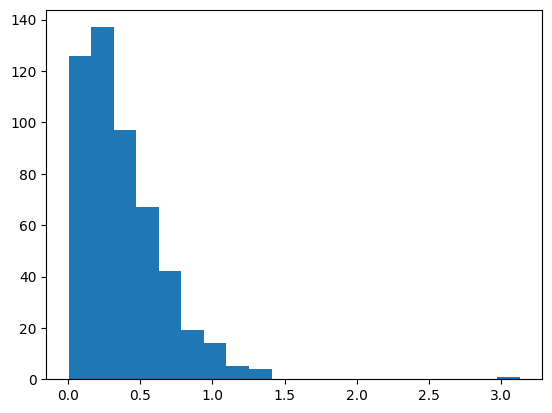

In [10]:
from matplotlib import pyplot as plt 
plt.hist(d, bins=20)
plt.show()

In [11]:
d.sort(reverse=True)

Candidate dimensions for gender:

In [12]:
n = 10
topn = []
for v in d[:n]:
    print(diff[v], v)
    topn.append(diff[v])

print(topn)

371 3.1281805061328996
100 1.4055948719323312
403 1.3106351132297154
195 1.3026217173312338
202 1.2735499691814636
117 1.1760017711652213
306 1.1636305211252354
293 1.159829550152876
168 1.1112661871840732
245 1.0982064430062575
[371, 100, 403, 195, 202, 117, 306, 293, 168, 245]


### Dimensions with intra class low std

In [17]:
masc_n_we.loc[:,:'511'].std().sort_values()[:10]

508    1.910298
158    1.991195
321    2.029548
408    2.062649
229    2.103610
186    2.120308
497    2.165844
462    2.189320
449    2.194183
101    2.195823
dtype: float64

In [34]:
masc_n_we.loc[:,:'511'].std().sort_values()[:-10:-1]

371    13.392190
212     3.933971
361     3.828067
221     3.614140
481     3.592288
52      3.553359
492     3.544100
349     3.540169
155     3.522472
dtype: float64

In [18]:
fem_n_we.loc[:,:'511'].std().sort_values()[:10]

508    1.831692
408    2.037856
186    2.045787
321    2.053636
158    2.071868
229    2.077829
47     2.165662
417    2.166103
455    2.175142
497    2.182031
dtype: float64

Dimensions 508, 158, 321, 408, 229, 186 and 497 appear in the top-10-lowest-std for both feminine and masculine nouns. We will now observe whether the values for these dimensions are distributed equally among those two classes or not.

<AxesSubplot: xlabel='321', ylabel='Count'>

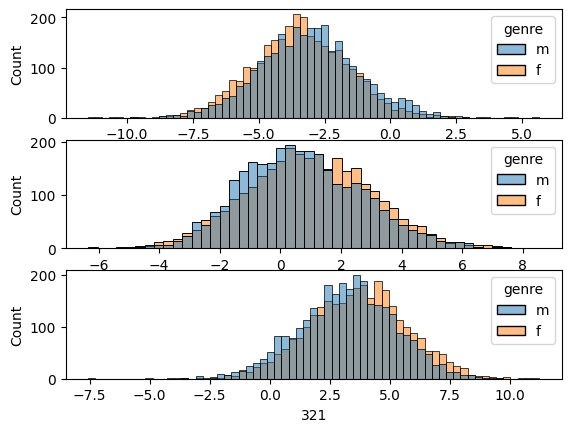

In [45]:
import seaborn as sns
from matplotlib import pyplot as plt
fig, axs = plt.subplots(3,1)

sns.histplot(data = all_n_we, x = "508", hue='genre', ax=axs[0])
sns.histplot(data = all_n_we, x = "158", hue='genre', ax=axs[1])
sns.histplot(data = all_n_we, x = "321", hue='genre', ax=axs[2])

<AxesSubplot: xlabel='497', ylabel='Count'>

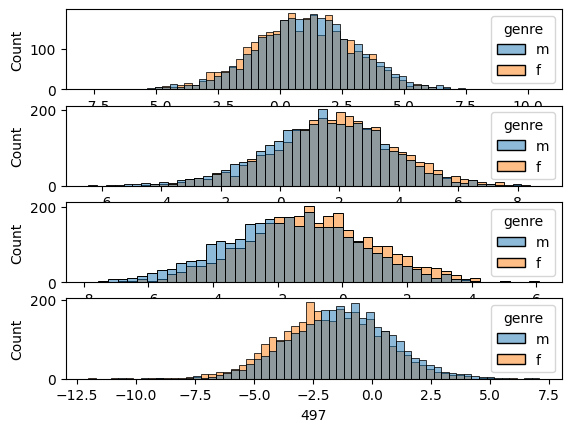

In [46]:
fig, axs = plt.subplots(4,1)
sns.histplot(data = all_n_we, x = "408", hue='genre', ax=axs[0])
sns.histplot(data = all_n_we, x = "229", hue='genre', ax=axs[1])
sns.histplot(data = all_n_we, x = "186", hue='genre', ax=axs[2])
sns.histplot(data = all_n_we, x = "497", hue='genre', ax=axs[3])

So all of these 7 dimensions having intra-class low std also have extra-class low std.  
Dimensions having low std for MASC but not for FEM:

<AxesSubplot: xlabel='101', ylabel='Count'>

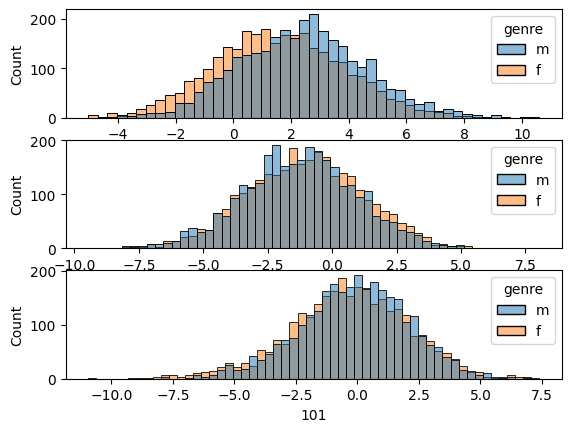

In [47]:
fig, axs = plt.subplots(3,1)

sns.histplot(data = all_n_we, x = "462", hue='genre', ax=axs[0])
sns.histplot(data = all_n_we, x = "449", hue='genre', ax=axs[1])
sns.histplot(data = all_n_we, x = "101", hue='genre', ax=axs[2])

Dimensions having low std for MASC but not for FEM:

<AxesSubplot: xlabel='455', ylabel='Count'>

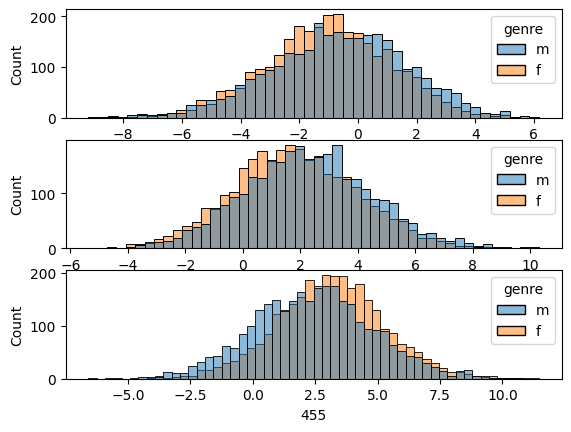

In [48]:
fig, axs = plt.subplots(3,1)

sns.histplot(data = all_n_we, x = "47", hue='genre', ax=axs[0])
sns.histplot(data = all_n_we, x = "417", hue='genre', ax=axs[1])
sns.histplot(data = all_n_we, x = "455", hue='genre', ax=axs[2])

So none of them seem like good candidates for encoding gender. 

### Correlation study

In [50]:
import numpy as np
gender_corr_df = pd.DataFrame(columns=["correlation_with_gender"])
gender_list = []

for i in range(512):
    gender_list.append(all_n_we.loc[:,[str(i), 'gender']].corr().iloc[0][-1])

gender_corr_df["correlation_with_gender"] = gender_list
gender_corr_df["sign"] = np.sign(gender_corr_df["correlation_with_gender"])
gender_corr_df["abs"] = abs(gender_corr_df["correlation_with_gender"])

In [63]:
gender_corr_df.sort_values("abs")[-10:][::-1]

,correlation_with_gender,sign,abs
100,0.294138,1.0,0.294138
195,0.265500,1.0,0.265500
117,0.234024,1.0,0.234024
403,0.227832,1.0,0.227832
316,-0.211124,-1.0,0.211124
306,0.210509,1.0,0.210509
202,-0.202084,-1.0,0.202084
245,-0.200253,-1.0,0.200253
377,-0.195400,-1.0,0.195400
499,-0.194677,-1.0,0.194677


Dimensions 100, 195, 117, 403, 306, 202 and 245 were already found among the top10 with largest difference between masc_avg and fem_avg. We'll test these first.

<AxesSubplot: xlabel='117', ylabel='Count'>

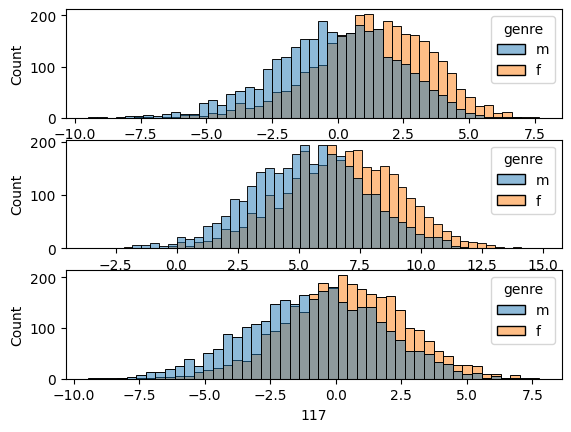

In [64]:
fig, axs = plt.subplots(3,1)

sns.histplot(data = all_n_we, x = "100", hue='genre', ax=axs[0])
sns.histplot(data = all_n_we, x = "195", hue='genre', ax=axs[1])
sns.histplot(data = all_n_we, x = "117", hue='genre', ax=axs[2])

<AxesSubplot: xlabel='245', ylabel='Count'>

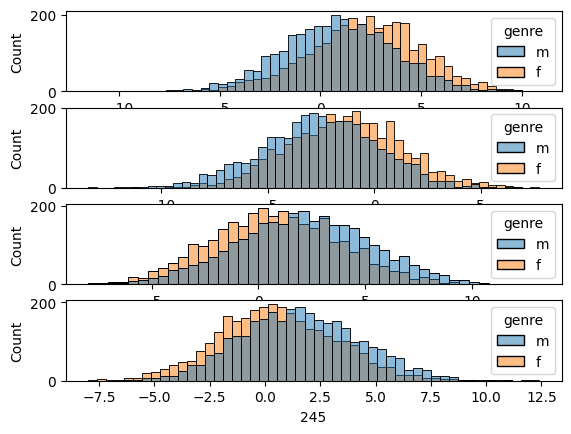

In [65]:
fig, axs = plt.subplots(4,1)
sns.histplot(data = all_n_we, x = "403", hue='genre', ax=axs[0])
sns.histplot(data = all_n_we, x = "306", hue='genre', ax=axs[1])
sns.histplot(data = all_n_we, x = "202", hue='genre', ax=axs[2])
sns.histplot(data = all_n_we, x = "245", hue='genre', ax=axs[3])

Remaining ones: 316, 377 and 499

<AxesSubplot: xlabel='499', ylabel='Count'>

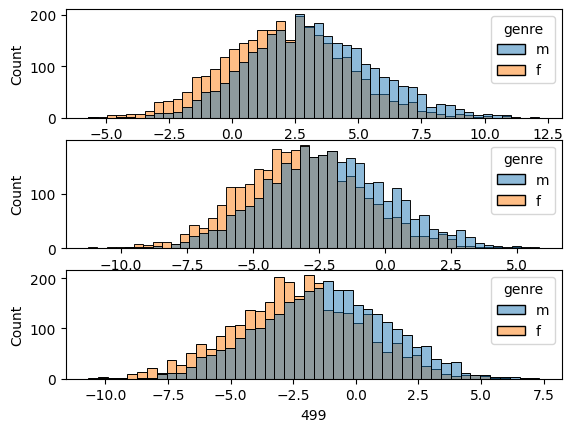

In [66]:
fig, axs = plt.subplots(3,1)

sns.histplot(data = all_n_we, x = "316", hue='genre', ax=axs[0])
sns.histplot(data = all_n_we, x = "377", hue='genre', ax=axs[1])
sns.histplot(data = all_n_we, x = "499", hue='genre', ax=axs[2])